In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [24]:
# Load the data from the txt file, skip the first column (usecols specifies which columns to load)
data = np.loadtxt('df_CAM_UTM.txt', delimiter=',', usecols=(1, 2, 3))

# Split the columns into variables (X, Y, and Elevation)
x_coord, y_coord, z_wells = data.T  # Transpose for easy unpacking

# Print the loaded data
print("X coordinates:", x_coord), print("Y coordinates:", y_coord), print("Elevations:", elevation);

X coordinates: [642148.73308783 642146.54931114 642144.36553418]
Y coordinates: [1105249.52624115 1105247.30581951 1105245.08539804]
Elevations: [3.6   3.301 2.981]


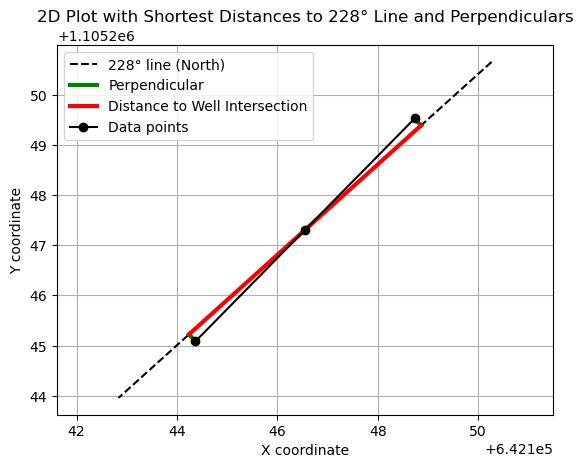

Shortest distance from Well 1 to the 228° line: 0.1889
Shortest distance from Well 3 to the 228° line: 0.1889
Distance from Well 2 to intersection of Well 1's perpendicular: 3.1086
Distance from Well 2 to intersection of Well 3's perpendicular: 3.1086


In [27]:
# Well 2 is the middle coordinate
x_well2 = x_coord[1]
y_well2 = y_coord[1]

# Define the angle of 228 degrees (converted to radians)
angle_deg = 228
angle_rad = np.radians(angle_deg)

# Define the line length extension (extend far enough to cover all wells)
line_extension = 5  # You can adjust this to fit your plot size

# Calculate the two endpoints of the line at 228 degrees from well 2
x_line_start = x_well2 - line_extension * np.sin(angle_rad)
y_line_start = y_well2 - line_extension * np.cos(angle_rad)
x_line_end = x_well2 + line_extension * np.sin(angle_rad)
y_line_end = y_well2 + line_extension * np.cos(angle_rad)

# Function to calculate the shortest distance from a point to the 228° line
def shortest_distance(x0, y0, x1, y1, x2, y2):
    """Calculate shortest distance from point (x0, y0) to the line through (x1, y1) and (x2, y2)"""
    return abs((y2 - y1) * x0 - (x2 - x1) * y0 + x2 * y1 - y2 * x1) / np.sqrt((y2 - y1)**2 + (x2 - x1)**2)

# Calculate the shortest distance for Well 1 and Well 3
distance_well1 = shortest_distance(x_coord[0], y_coord[0], x_line_start, y_line_start, x_line_end, y_line_end)
distance_well3 = shortest_distance(x_coord[2], y_coord[2], x_line_start, y_line_start, x_line_end, y_line_end)

# Function to find the foot of the perpendicular from a point to a line
def perpendicular_foot(x0, y0, x1, y1, x2, y2):
    """Finds the foot of the perpendicular from point (x0, y0) to the line through (x1, y1) and (x2, y2)"""
    dx = x2 - x1
    dy = y2 - y1
    t = ((x0 - x1) * dx + (y0 - y1) * dy) / (dx**2 + dy**2)
    x_foot = x1 + t * dx
    y_foot = y1 + t * dy
    return x_foot, y_foot

# Calculate the foot of the perpendicular for Well 1 and Well 3
foot_well1 = perpendicular_foot(x_coord[0], y_coord[0], x_line_start, y_line_start, x_line_end, y_line_end)
foot_well3 = perpendicular_foot(x_coord[2], y_coord[2], x_line_start, y_line_start, x_line_end, y_line_end)

# Calculate the Euclidean distance between Well 2 and the two intersection points
def euclidean_distance(x1, y1, x2, y2):
    """Calculate Euclidean distance between two points (x1, y1) and (x2, y2)"""
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

distance_well2_to_foot_well1 = euclidean_distance(x_well2, y_well2, foot_well1[0], foot_well1[1])
distance_well2_to_foot_well3 = euclidean_distance(x_well2, y_well2, foot_well3[0], foot_well3[1])

# Plot the line that passes through well 2 and extends in both directions
plt.plot([x_line_start, x_line_end], [y_line_start, y_line_end], color='black', linestyle='--', label=f'228° line (North)')
# Plot the perpendicular lines from Well 1 and Well 3 to the 228° line
plt.plot([x_coord[0], foot_well1[0]], [y_coord[0], foot_well1[1]], 'green', linewidth=3, label='Perpendicular')
plt.plot([x_coord[2], foot_well3[0]], [y_coord[2], foot_well3[1]], 'green', linewidth=3)
# Plot the distances as thick lines
plt.plot([x_well2, foot_well1[0]], [y_well2, foot_well1[1]], 'red', linewidth=3, label='Distance to Well Intersection')
plt.plot([x_well2, foot_well3[0]], [y_well2, foot_well3[1]], 'red', linewidth=3)
# Plot the points (X, Y)
plt.plot(x_coord, y_coord, color='black', marker='o', label='Data points')

# Add labels and title
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('2D Plot with Shortest Distances to 228° Line and Perpendiculars')

# Display the legend
plt.legend()

# Show the plot with a grid and ensure equal axis scaling
plt.grid(True)
plt.axis('equal')  # Ensure equal scaling for both axes
plt.show()

# Print the distances
print(f"Shortest distance from Well 1 to the 228° line: {distance_well1:.4f}")
print(f"Shortest distance from Well 3 to the 228° line: {distance_well3:.4f}")
# Print the distances from Well 2 to the intersection points (feet of the perpendiculars)
print(f"Distance from Well 2 to intersection of Well 1's perpendicular: {distance_well2_to_foot_well1:.4f}")
print(f"Distance from Well 2 to intersection of Well 3's perpendicular: {distance_well2_to_foot_well3:.4f}")

Total distance from Well 1: 3.3438
Total distance from Well 3: 3.3438


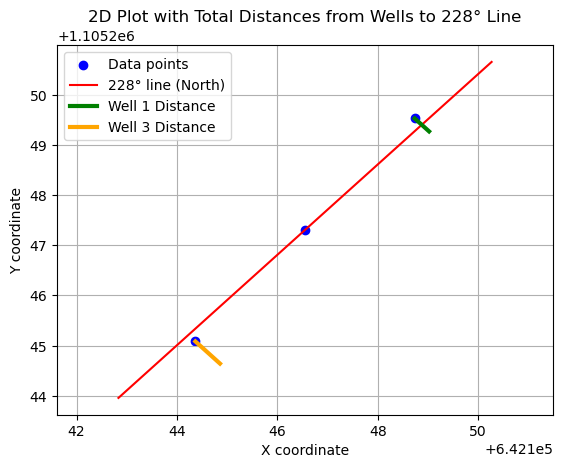

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Coordinates for the wells
well_data = [
    (112, 642148.7330878308, 1105249.5262411537),  # Well 1
    (117, 642146.5493111424, 1105247.3058195126),  # Well 2
    (123, 642144.3655341836, 1105245.08539804)    # Well 3
]

# Extracting coordinates
wells = np.array(well_data)
x_coord = wells[:, 1]
y_coord = wells[:, 2]

# Plot the points (X, Y)
plt.scatter(x_coord, y_coord, color='blue', label='Data points')

# Well 2 is the middle coordinate
x_well2 = x_coord[1]
y_well2 = y_coord[1]

# Define the angle of 228 degrees (converted to radians)
angle_deg = 228
angle_rad = np.radians(angle_deg)

# Define the line length extension (extend far enough to cover all wells)
line_extension = 5  # You can adjust this to fit your plot size

# Calculate the two endpoints of the line at 228 degrees from well 2
x_line_start = x_well2 - line_extension * np.sin(angle_rad)
y_line_start = y_well2 - line_extension * np.cos(angle_rad)
x_line_end = x_well2 + line_extension * np.sin(angle_rad)
y_line_end = y_well2 + line_extension * np.cos(angle_rad)

# Plot the line that passes through well 2 and extends in both directions
plt.plot([x_line_start, x_line_end], [y_line_start, y_line_end], color='red', label=f'228° line (North)')

# Function to calculate the shortest distance from a point to the 228° line
def shortest_distance(x0, y0, x1, y1, x2, y2):
    """Calculate shortest distance from point (x0, y0) to the line through (x1, y1) and (x2, y2)"""
    return abs((y2 - y1) * x0 - (x2 - x1) * y0 + x2 * y1 - y2 * x1) / np.sqrt((y2 - y1)**2 + (x2 - x1)**2)

# Calculate distances for Well 1
distance_well1_line = shortest_distance(x_coord[0], y_coord[0], x_line_start, y_line_start, x_line_end, y_line_end)

# Find intersection of Well 1's perpendicular line with the 228° line
# Slope of the 228° line
slope_228 = np.tan(angle_rad)
# Slope of the perpendicular line (negative reciprocal)
slope_perpendicular = -1 / slope_228

# Equation of the line from Well 1: y - y1 = slope * (x - x1)
# Rearranging to y = mx + b
b1 = y_coord[0] - slope_perpendicular * x_coord[0]

# Finding intersection (solve for x and y)
# 228° line: y = slope_228 * x + b2 (where b2 is calculated from one of the line endpoints)
b2 = y_line_start - slope_228 * x_line_start

# Set the equations equal to find intersection
x_intersect_well1 = (b2 - b1) / (slope_perpendicular - slope_228)
y_intersect_well1 = slope_228 * x_intersect_well1 + b2

# Distance from Well 2 to intersection
distance_well2_to_intersect_well1 = np.sqrt((x_intersect_well1 - x_well2)**2 + (y_intersect_well1 - y_well2)**2)

# Total distance for Well 1
total_distance_well1 = distance_well1_line + distance_well2_to_intersect_well1

# Calculate distances for Well 3
distance_well3_line = shortest_distance(x_coord[2], y_coord[2], x_line_start, y_line_start, x_line_end, y_line_end)

# Find intersection of Well 3's perpendicular line with the 228° line
b3 = y_coord[2] - slope_perpendicular * x_coord[2]
x_intersect_well3 = (b2 - b3) / (slope_perpendicular - slope_228)
y_intersect_well3 = slope_228 * x_intersect_well3 + b2

# Distance from Well 2 to intersection
distance_well2_to_intersect_well3 = np.sqrt((x_intersect_well3 - x_well2)**2 + (y_intersect_well3 - y_well2)**2)

# Total distance for Well 3
total_distance_well3 = distance_well3_line + distance_well2_to_intersect_well3

# Print the total distances
print(f"Total distance from Well 1: {total_distance_well1:.4f}")
print(f"Total distance from Well 3: {total_distance_well3:.4f}")

# Plot the distances as thick lines
plt.plot([x_coord[0], x_intersect_well1], [y_coord[0], y_intersect_well1], color='green', linewidth=3, label='Well 1 Distance')
plt.plot([x_coord[2], x_intersect_well3], [y_coord[2], y_intersect_well3], color='orange', linewidth=3, label='Well 3 Distance')

# Add labels and title
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('2D Plot with Total Distances from Wells to 228° Line')

# Display the legend
plt.legend()

# Show the plot with a grid and ensure equal axis scaling
plt.grid(True)
plt.axis('equal')  # Ensure equal scaling for both axes
plt.show()


In [ ]:
#This code is for altering the local transect and interpolate, so that it can be used as the iz input for matlab CoastalCam

#########known#########
laserheight = 0.02
#well base
distance_wells = [0, , unknown2] #distance from well 1 (either 228, or 226 degree North)


#########input 04_10_24#########
#daily height fluctuations
fluc_wells = [23.2, 19.4, 19.8] / 100 #height well above sand level

transect_dist = [3.353, 6.203, 9.049, 11.871, 14.757, 17.582, 20.509, 23.422, 26.228] #distance from well 2
transect_z = [-0.575, -0.812, -1.03, -1.23, -1.49, -1.7, -1.94, -2.15, -2.35]

#########automatic part#########
#combine into one dist/z list
dist = distance_wells + (transect_dist - distance_wells[1]) #distance from well 1
z = z_wells -fluc_wells + (transect_z - fluc_wells[1] - laserheight) #height above sea level

#print
print(dist)
print(z)

#plot
plt.plot(dist, z)